In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

dataset=load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()

df.job_posted_date=pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x )

df_da_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country']=='United States')]

In [12]:
df_da_US.head()
import seaborn as sns

In [14]:
df_country = df_da_US.job_location.value_counts().to_frame().head(10)
df_country

,count
job_location,
Anywhere,5106
"New York, NY",3035
"Atlanta, GA",2741
"Chicago, IL",2337
"Austin, TX",1919
"Dallas, TX",1862
"Washington, DC",1592
"Charlotte, NC",1433
"Tampa, FL",1431


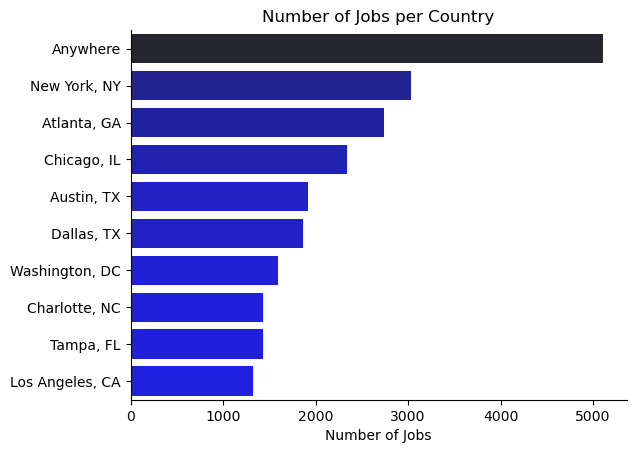

In [16]:
sns.barplot(data=df_country, x = 'count', y = 'job_location', hue = 'count', palette= 'dark:b_r', legend=False)
sns.despine() # remove figure border
plt.title('Number of Jobs per Country')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

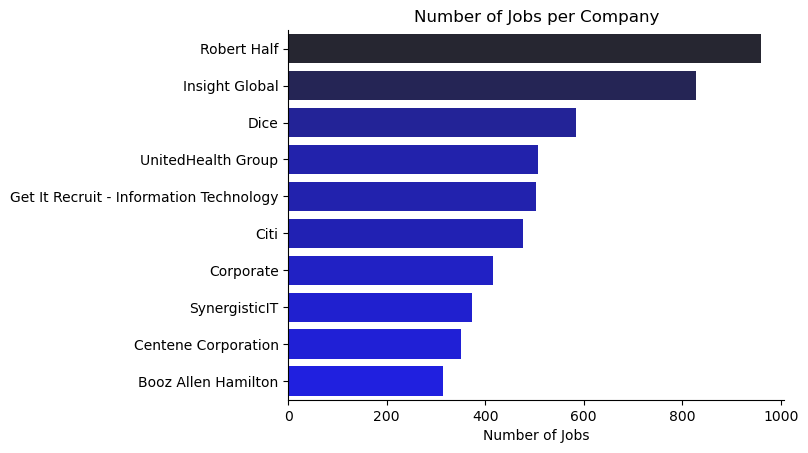

In [17]:
df_company = df_da_US.company_name.value_counts().to_frame().head(10)
df_company

sns.barplot(data=df_company, x = 'count', y = 'company_name', hue = 'count', palette= 'dark:b_r', legend=False)
sns.despine() # remove figure border
plt.title('Number of Jobs per Company')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

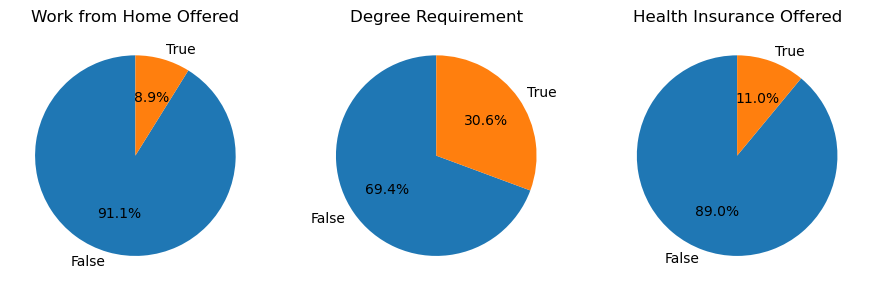

In [18]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3, figsize=(11, 3.5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

plt.show()